In [27]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import multiprocessing
from sklearn.decomposition import PCA


In [28]:
topics = pd.read_csv("topics_doc2vec.csv")
content = pd.read_csv("content_doc2vec.csv")

In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sabina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# removing special characters and stop words from the text
stop_words_l=stopwords.words('english')

In [31]:
content['combined_text']=content['combined_text'].apply(lambda x: " ".join(re.sub(r'[^a-zA-Z0-9]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z0-9]',' ',w).lower() not in stop_words_l) )


In [32]:
topics['combined_text']=topics['combined_text'].apply(lambda x: " ".join(re.sub(r'[^a-zA-Z0-9]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z0-9]',' ',w).lower() not in stop_words_l) )


In [33]:
# Create tagged documents for topics and content
documents = []

In [34]:
# TaggedDocument for topics
for idx, topic_text in enumerate(topics['combined_text']):
    documents.append(TaggedDocument(words=topic_text.split(), tags=[f'topic_{idx}']))

In [35]:
# TaggedDocument for content
for idx, content_text in enumerate(content['combined_text']):
    documents.append(TaggedDocument(words=content_text.split(), tags=[f'content_{idx}']))

In [36]:
# Train the Doc2Vec model
model = Doc2Vec(vector_size=300, window= 0, min_count = 0, dm=0, epochs=100, workers=multiprocessing.cpu_count())
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

In [37]:
# Get the vectors of words in your vocabulary
word_vectors = [model.wv.get_vector(word) for word in model.wv.key_to_index]


In [38]:
# Reduce the dimensionality of word vectors for visualization
pca = PCA(n_components=2)
word_vectors_2D = pca.fit_transform(word_vectors)

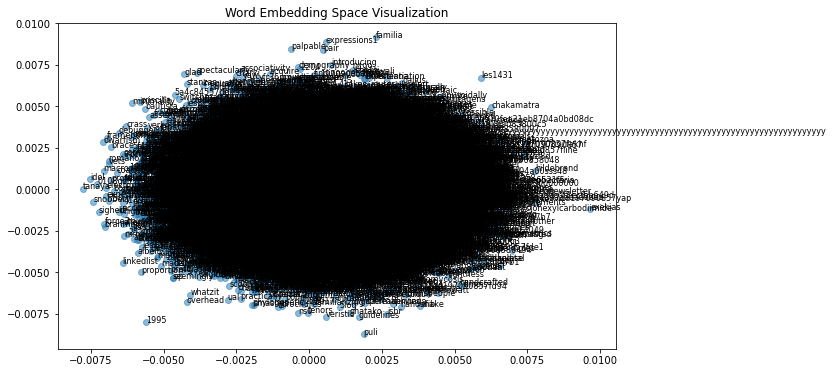

In [39]:
# Plot the 2D word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2D[:, 0], word_vectors_2D[:, 1], alpha=0.5)
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(word_vectors_2D[i, 0], word_vectors_2D[i, 1]), fontsize=8)
plt.title('Word Embedding Space Visualization')
plt.show()

In [85]:
#visualization with small datasets and vector_size
topic_1k = topics.head(1000)
content_1k = content.head(1000)

In [86]:
# Create tagged documents for topics and content
documents = []

In [87]:
# TaggedDocument for topics
for idx, topic_text in enumerate(topic_1k['combined_text']):
    documents.append(TaggedDocument(words=topic_text.split(), tags=[f'topic_{idx}']))

In [88]:
# TaggedDocument for content
for idx, content_text in enumerate(content_1k['combined_text']):
    documents.append(TaggedDocument(words=content_text.split(), tags=[f'content_{idx}']))

In [99]:
documents[:5]

[TaggedDocument(words=['detection', 'resistors', 'investigating', 'materials', 'cause', 'reduction', 'deflection', 'connected', 'series', 'meter', 'discoveries', 'projects', 'physics', 'science'], tags=['topic_0']),
 TaggedDocument(words=['inputs', 'outputs', 'function', 'understand', 'little', 'functions', 'algebra', 'functions', '9th', 'grade', 'mathematics', 'per', 'year', 'aligned', 'bncc'], tags=['topic_1']),
 TaggedDocument(words=['transcripts', 'flow', 'charts', 'logical', 'thinking', 'engineering', 'blossoms'], tags=['topic_2']),
 TaggedDocument(words=['graphs', 'exponential', 'functions', 'algebra', '2', 'level', 'learn', 'graphing', 'complex', 'exponential', 'functions', 'form', 'y', 'a', 'b', 'x', 'c', 'd', 'exponential', 'logarithmic', 'functions', 'algebra', 'all', 'content', 'mathematics'], tags=['topic_3']),
 TaggedDocument(words=['sum', '100', 'learn', 'add', 'two', 'digit', 'numbers', 'like', '37', '49', 'add', 'subtract', '100', 'elementary', 'mathematics', 'class', '

In [90]:
# Train the Doc2Vec model
model = Doc2Vec(vector_size=30, window= 0, min_count = 0, dm=0, epochs=100, workers=multiprocessing.cpu_count())
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

In [91]:
# Get the vectors of words in your vocabulary
word_vectors = [model.wv.get_vector(word) for word in model.wv.key_to_index]

In [92]:
word_vectors

[array([-0.00178742,  0.0007881 ,  0.01701117,  0.03003091, -0.03100983,
        -0.0237227 ,  0.02152958,  0.02990996, -0.01671809, -0.01254457,
         0.02460168, -0.00511157, -0.01512204,  0.02184684, -0.01620053,
        -0.00605339,  0.0095886 ,  0.00330625, -0.02761738, -0.03149606,
         0.02437255,  0.01690087,  0.02252564,  0.00254289,  0.02116963,
        -0.01135122, -0.00315467,  0.01922858, -0.02507213, -0.01312034],
       dtype=float32),
 array([-0.02503861, -0.00310014,  0.03179373, -0.02439722, -0.00777923,
        -0.00645914,  0.02692479, -0.01976965,  0.00015054, -0.01584578,
        -0.03201183,  0.01669098, -0.02919862, -0.01463942, -0.000117  ,
        -0.00098727, -0.02553747,  0.03204914,  0.01660686,  0.03077715,
        -0.02719306,  0.01498599, -0.01379025,  0.00274845,  0.02832873,
        -0.01487392,  0.01505833, -0.0226232 , -0.01182829,  0.03132836],
       dtype=float32),
 array([-0.00525884,  0.00107124, -0.0138021 , -0.02560896, -0.00502669,
   

In [93]:
# Reduce the dimensionality of word vectors for visualization
pca = PCA(n_components=2)
word_vectors_2D = pca.fit_transform(word_vectors)

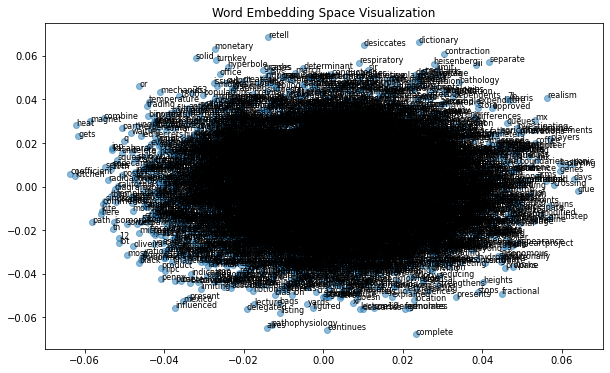

In [94]:
# Plot the 2D word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2D[:, 0], word_vectors_2D[:, 1], alpha=0.5)
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(word_vectors_2D[i, 0], word_vectors_2D[i, 1]), fontsize=8)
plt.title('Word Embedding Space Visualization')
plt.show()